In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("prep.csv",index_col=None)

In [4]:
df2=dataset

df2 = pd.get_dummies(df2, drop_first=True)
df2 

,age,bp,al,su,bgr,bu,sc,sod,pot,hrmo,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_yes,pe_yes,ane_yes,classification_yes
0,2.000000,76.459948,3.0,0.0,148.112676,57.482105,3.077356,137.528754,4.627244,12.518156,...,False,False,False,False,False,False,True,True,False,True
1,3.000000,76.459948,2.0,0.0,148.112676,22.000000,0.700000,137.528754,4.627244,10.700000,...,True,False,False,False,False,False,True,False,False,True
2,4.000000,76.459948,1.0,0.0,99.000000,23.000000,0.600000,138.000000,4.400000,12.000000,...,True,False,False,False,False,False,True,False,False,True
3,5.000000,76.459948,1.0,0.0,148.112676,16.000000,0.700000,138.000000,3.200000,8.100000,...,True,False,False,False,False,False,True,False,True,True
4,5.000000,50.000000,0.0,0.0,148.112676,25.000000,0.600000,137.528754,4.627244,11.800000,...,True,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,51.492308,70.000000,0.0,0.0,219.000000,36.000000,1.300000,139.000000,3.700000,12.500000,...,True,False,False,False,False,False,True,False,False,True
395,51.492308,70.000000,0.0,2.0,220.000000,68.000000,2.800000,137.528754,4.627244,8.700000,...,True,False,False,True,True,False,True,False,True,True
396,51.492308,70.000000,3.0,0.0,110.000000,115.000000,6.000000,134.000000,2.700000,9.100000,...,True,False,False,True,True,False,False,False,False,True
397,51.492308,90.000000,0.0,0.0,207.000000,80.000000,6.800000,142.000000,5.500000,8.500000,...,True,False,False,True,True,False,True,False,True,True


In [5]:
df2.shape

(399, 28)

In [6]:
indep_X=df2.drop('classification_yes', axis=1)
dep_Y=df2['classification_yes']

indep_X

,age,bp,al,su,bgr,bu,sc,sod,pot,hrmo,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_yes,pe_yes,ane_yes
0,2.000000,76.459948,3.0,0.0,148.112676,57.482105,3.077356,137.528754,4.627244,12.518156,...,True,False,False,False,False,False,False,True,True,False
1,3.000000,76.459948,2.0,0.0,148.112676,22.000000,0.700000,137.528754,4.627244,10.700000,...,True,True,False,False,False,False,False,True,False,False
2,4.000000,76.459948,1.0,0.0,99.000000,23.000000,0.600000,138.000000,4.400000,12.000000,...,True,True,False,False,False,False,False,True,False,False
3,5.000000,76.459948,1.0,0.0,148.112676,16.000000,0.700000,138.000000,3.200000,8.100000,...,True,True,False,False,False,False,False,True,False,True
4,5.000000,50.000000,0.0,0.0,148.112676,25.000000,0.600000,137.528754,4.627244,11.800000,...,True,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,51.492308,70.000000,0.0,0.0,219.000000,36.000000,1.300000,139.000000,3.700000,12.500000,...,True,True,False,False,False,False,False,True,False,False
395,51.492308,70.000000,0.0,2.0,220.000000,68.000000,2.800000,137.528754,4.627244,8.700000,...,True,True,False,False,True,True,False,True,False,True
396,51.492308,70.000000,3.0,0.0,110.000000,115.000000,6.000000,134.000000,2.700000,9.100000,...,True,True,False,False,True,True,False,False,False,False
397,51.492308,90.000000,0.0,0.0,207.000000,80.000000,6.800000,142.000000,5.500000,8.500000,...,True,True,False,False,True,True,False,True,False,True


In [7]:
dep_Y

0       True
1       True
2       True
3       True
4       True
       ...  
394     True
395     True
396     True
397     True
398    False
Name: classification_yes, Length: 399, dtype: bool

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(indep_X, dep_Y, test_size=0.2, random_state=42)

In [9]:
# Create a StandardScaler 
scaler = StandardScaler()
# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
rf_model=RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)

In [11]:
rf_model=rf_model.fit(X_train_scaled,y_train)

# feature_importances

In [13]:
 #Retrieve feature importance scores make a list
feature_importances =list(rf_model.feature_importances_)
feature_importances

[0.02345613569480969,
 0.0026892262395733675,
 0.08422140226242984,
 0.0,
 0.02396897676710053,
 0.05375645339964211,
 0.038197236196475366,
 0.03991830099538806,
 0.003057605595234331,
 0.17997590656820436,
 0.32466419079274234,
 0.0035196268723462517,
 0.12634883937934901,
 0.001214775323686215,
 0.01194996286463879,
 0.01997970595763808,
 0.0,
 0.0014527439425983406,
 0.004219886783939369,
 0.0012572479116928802,
 0.0,
 0.03906111690683461,
 0.00911379960537812,
 0.0,
 0.0012961940082590296,
 0.0037567656849541316,
 0.0029239002470853167]

In [14]:
# Display feature importances in descending order
feature_importances_sorted = sorted(zip(indep_X.columns, feature_importances), key=lambda x: x[1], reverse=True)

for feature, importance in feature_importances_sorted:
    print(f'{feature}: {importance}')

pcv: 0.32466419079274234
hrmo: 0.17997590656820436
rc: 0.12634883937934901
al: 0.08422140226242984
bu: 0.05375645339964211
sod: 0.03991830099538806
htn_yes: 0.03906111690683461
sc: 0.038197236196475366
bgr: 0.02396897676710053
age: 0.02345613569480969
sg_d: 0.01997970595763808
sg_c: 0.01194996286463879
dm_yes: 0.00911379960537812
pc_normal: 0.004219886783939369
pe_yes: 0.0037567656849541316
wc: 0.0035196268723462517
pot: 0.003057605595234331
ane_yes: 0.0029239002470853167
bp: 0.0026892262395733675
rbc_normal: 0.0014527439425983406
appet_yes: 0.0012961940082590296
pcc_present: 0.0012572479116928802
sg_b: 0.001214775323686215
su: 0.0
sg_e: 0.0
ba_present: 0.0
cad_yes: 0.0


In [15]:
# Extract features and importance scores separately from the sorted list
features_sorted, importance_scores_sorted = zip(*feature_importances_sorted)

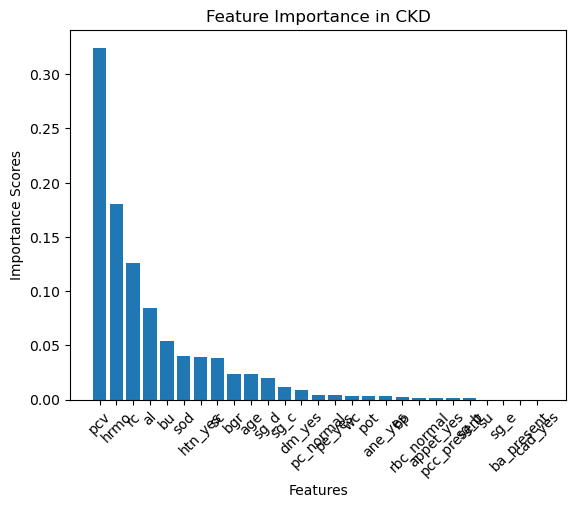

In [17]:
# Plotting feature importance
plt.bar(features_sorted, importance_scores_sorted)
plt.xlabel('Features')
plt.ylabel('Importance Scores')
plt.title('Feature Importance in CKD')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

In [18]:
#Expalantions:

#Certainly! The line zip(*feature_importances_sorted) is a way to "unzip" or transpose a list of tuples. Let me break it down:

#feature_importances_sorted is a list of tuples, where each tuple contains a feature and its corresponding importance score. For example, it might look like this:

#python:eg [('Feature1', 0.25), ('Feature2', 0.4), ('Feature3', 0.35)]
#Now, zip(*feature_importances_sorted) is a special syntax in Python that is used to unpack the tuples in the opposite way they were packed. It essentially transposes the list of tuples. In this case, it transforms the above list into two separate lists:

#('Feature1', 'Feature2', 'Feature3') - This becomes the list of feature names.
#(0.25, 0.4, 0.35) - This becomes the list of corresponding importance scores.
#So, zip(*feature_importances_sorted) is a concise way to separate the feature names and importance scores from the list of tuples. This is often used when you want to plot or analyze the data in a way that requires the features and their scores to be in separate lists

In [19]:
def log_model_feature(X_train_scaled, y_train, threshold=0.1):
    
    log_model=LogisticRegression(solver='lbfgs')
    Log_model=log_model.fit(X_train_scaled, y_train)
    # Get feature importances
    #Feature_importances = list(Log_model.feature_importances_)
    Feature_importances = list(Log_model.coef_)
    # Create a sorted list of feature importances
    Feature_importances_sorted = sorted(zip(indep_X.columns, Feature_importances), key=lambda x: x[1], reverse=True)
    # Display feature importances
    for feature, importance in Feature_importances_sorted:
        #print(f'{feature}: {importance}')   
    # Extract features and importance scores separately from the sorted list
        features_sorted,importance_scores_sorted = zip(*Feature_importances_sorted)
        # Select features based on the importance threshold
       # selected_features = [feature for feature, importance in Feature_importances_sorted if importance > threshold]
        log_features = [feature for feature, importance in Feature_importances_sorted if any(np.array(importance) > threshold)]
       #print("\nSelected features:")
        print(log_features)
    
        return log_features
    
    
def DecisionTree_Feature(X_train_scaled, y_train, threshold=0.1):

    dt_model=DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
    DT_model=dt_model.fit(X_train_scaled, y_train)
    # Get feature importances
    feature_importances = list(DT_model.feature_importances_)
    # Create a sorted list of feature importances
    feature_importances_sorted = sorted(zip(indep_X.columns, feature_importances), key=lambda x: x[1], reverse=True)
    # Display feature importances
    for feature, importance in feature_importances_sorted:
        #print(f'{feature}: {importance}')   
    # Extract features and importance scores separately from the sorted list
        features_sorted,importance_scores_sorted = zip(*feature_importances_sorted)
        # Select features based on the importance threshold
        DT_features = [feature for feature, importance in feature_importances_sorted if importance > threshold]
        #print("\nSelected features:")
        print(DT_features)

        return DT_features 


def SVML_feature(X_train_scaled, y_train, threshold=0.1):

    SVM=SVC(kernel='linear',random_state=0)
    SVM_model=SVM.fit(X_train_scaled, y_train)
    # Get feature importances
    feature_importances = list(SVM_model.coef_)
    # Create a sorted list of feature importances
    feature_importances_sorted = sorted(zip(indep_X.columns, feature_importances), key=lambda x: x[1], reverse=True)
    # Display feature importances
    for feature, importance in feature_importances_sorted:
        #print(f'{feature}: {importance}')   
    # Extract features and importance scores separately from the sorted list
        features_sorted,importance_scores_sorted = zip(*feature_importances_sorted)
        # Select features based on the importance threshold
    svml_features = [feature for feature, importance in feature_importances_sorted if any(np.array(importance) > threshold)]
        #print("\nSelected features:")
    print(svml_features)

    return svml_features


def SVMNL_feature(X_train_scaled, y_train, threshold=0.1):

    svm_model=SVC(kernel='rbf',random_state=0)
    SVMNL_model=svm_model.fit(X_train_scaled, y_train)
    # Get the indices of support vectors
    support_vector_indices = list(SVMNL_model.support_)
    # Get the coefficients (dual coefficients) associated with support vectors
    support_vector_coefficients = abs(SVMNL_model.dual_coef_)
    # Map the coefficients to the corresponding features
    feature_importances = {feature_index: coefficient for feature_index, coefficient in zip(support_vector_indices, support_vector_coefficients[0])}
    # Sort features by importance
    sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

    # Print or use the sorted features as needed
    print("Feature importances:")
    for feature_index, importance in sorted_features:
        #print(f"Feature {feature_index}: {importance}")
        
        #Select features based on the importance threshold
        svmnl_features = [feature for feature, importance in feature_importances_sorted if importance > threshold]
        print(svmnl_features)

        return svmnl_features 
    
    

def random_feature(X_train_scaled, y_train, threshold=0.1):
    
    rf_model=RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
    rf_model=rf_model.fit(X_train_scaled, y_train)
    # Get feature importances
    feature_importances = list(rf_model.feature_importances_)
    # Create a sorted list of feature importances
    feature_importances_sorted = sorted(zip(indep_X.columns, feature_importances), key=lambda x: x[1], reverse=True)
    # Display feature importances
    for feature, importance in feature_importances_sorted:
        #print(f'{feature}: {importance}')   
    # Extract features and importance scores separately from the sorted list
        features_sorted,importance_scores_sorted = zip(*feature_importances_sorted)
        # Select features based on the importance threshold
        rf_selected_features = [feature for feature, importance in feature_importances_sorted if importance > threshold]
        #print("\nSelected features:")
        print(rf_selected_features)

        return rf_selected_features

In [105]:
log_features=log_model_feature(X_train_scaled, y_train, threshold=0.3)
#log_features=result1
print(log_features)

['age']
['age']


In [106]:
DT_features = DecisionTree_Feature(X_train_scaled, y_train, threshold=0.3)
#DT_features=result2
print(DT_features)

['hrmo']
['hrmo']


In [107]:
svml_features = SVML_feature(X_train_scaled, y_train, threshold=0.3)
#svml_features=result3
print(svml_features)

['age']
['age']


In [108]:
svmnl_features = SVMNL_feature(X_train_scaled, y_train, threshold=0.3)
#svmnl_features=result4
print(svmnl_features)

Feature importances:
['pcv']
['pcv']


In [109]:
rf_selected_features=random_feature(X_train_scaled, y_train, threshold=0.3)
#rf_selected_features=result5
print(rf_selected_features)

['pcv']
['pcv']


In [110]:
def log_input(log_features):
    
    # Convert feature names to column indices
    feature_indices = [indep_X.columns.get_loc(feature) for feature in log_features]
    # Assuming X_train_scaled and X_test_scaled are numpy arrays
    X_train_current = {feature: X_train_scaled[:, int(index)] for feature, index in zip(log_features, feature_indices)}
    X_test_current = {feature: X_test_scaled[:, int(index)] for feature, index in zip(log_features, feature_indices)}
    # Convert dictionaries to numpy arrays
    #X_train_current_array = np.column_stack(list(X_train_current.values()))
    #X_test_current_array = np.column_stack(list(X_test_current.values()))

    log_X_train= np.column_stack(list(X_train_current.values()))
    log_X_test = np.column_stack(list(X_test_current.values()))

    return log_X_train,log_X_test



def DT_input(DT_features):
    
    # Convert feature names to column indices
    feature_indices = [indep_X.columns.get_loc(feature) for feature in DT_features]
    # Assuming X_train_scaled and X_test_scaled are numpy arrays
    X_train_current = {feature: X_train_scaled[:, int(index)] for feature, index in zip(DT_features, feature_indices)}
    X_test_current = {feature: X_test_scaled[:, int(index)] for feature, index in zip(DT_features, feature_indices)}
    # Convert dictionaries to numpy arrays
    DT_X_train = np.column_stack(list(X_train_current.values()))
    DT_X_test = np.column_stack(list(X_test_current.values()))

    return DT_X_train, DT_X_test



def svml_input(svml_features):
    
    # Convert feature names to column indices
    feature_indices = [indep_X.columns.get_loc(feature) for feature in svml_features]
    # Assuming X_train_scaled and X_test_scaled are numpy arrays
    X_train_current = {feature: X_train_scaled[:, int(index)] for feature, index in zip(svml_features, feature_indices)}
    X_test_current = {feature: X_test_scaled[:, int(index)] for feature, index in zip(svml_features , feature_indices)}
    # Convert dictionaries to numpy arrays
    svml_X_train = np.column_stack(list(X_train_current.values()))
    svml_X_test = np.column_stack(list(X_test_current.values()))

    return svml_X_train, svml_X_test



def svmnl_input(svmnl_features):
    
    # Convert feature names to column indices
    feature_indices = [indep_X.columns.get_loc(feature) for feature in svmnl_features]
    # Assuming X_train_scaled and X_test_scaled are numpy arrays
    X_train_current = {feature: X_train_scaled[:, int(index)] for feature, index in zip(svmnl_features, feature_indices)}
    X_test_current = {feature: X_test_scaled[:, int(index)] for feature, index in zip(svmnl_features, feature_indices)}
    # Convert dictionaries to numpy arrays
    svmnl_X_train = np.column_stack(list(X_train_current.values()))
    svmnl_X_test = np.column_stack(list(X_test_current.values()))

    return svmnl_X_train,svmnl_X_test



def rf_input(rf_selected_features):
    
    # Convert feature names to column indices
    feature_indices = [indep_X.columns.get_loc(feature) for feature in rf_selected_features]
    # Assuming X_train_scaled and X_test_scaled are numpy arrays
    X_train_current = {feature: X_train_scaled[:, int(index)] for feature, index in zip(rf_selected_features, feature_indices)}
    X_test_current = {feature: X_test_scaled[:, int(index)] for feature, index in zip(rf_selected_features, feature_indices)}
    # Convert dictionaries to numpy arrays
    X_train_current_array = np.column_stack(list(X_train_current.values()))
    X_test_current_array = np.column_stack(list(X_test_current.values()))

    return X_train_current_array,X_test_current_array


In [111]:
log_X_train,log_X_test=log_input(log_features)
print(log_X_train)
print(log_X_test)

[[-2.82621561]
 [-2.10592356]
 [ 1.43551235]
 [ 0.47512295]
 [-0.00507175]
 [-1.08550982]
 [ 0.47512295]
 [ 1.195415  ]
 [-0.48526645]
 [-0.7253638 ]
 [ 0.41509862]
 [ 1.01534199]
 [-0.42524211]
 [ 0.29504994]
 [ 0.2350256 ]
 [ 1.43551235]
 [ 1.73563404]
 [ 0.65519597]
 [ 0.95531765]
 [-0.96546115]
 [ 0.47512295]
 [-0.48526645]
 [-2.10592356]
 [-1.08550982]
 [-0.2451691 ]
 [-2.6461426 ]
 [-1.98587488]
 [-0.30519343]
 [ 1.195415  ]
 [-0.03554564]
 [-0.36521777]
 [ 0.05495259]
 [ 0.7152203 ]
 [ 1.6756097 ]
 [ 0.77524464]
 [-1.08550982]
 [-0.90543681]
 [ 0.7152203 ]
 [ 0.77524464]
 [ 0.65519597]
 [-0.12512042]
 [-0.48526645]
 [-2.10592356]
 [ 0.47512295]
 [-1.86582621]
 [ 1.25543934]
 [ 1.13539067]
 [-0.03554564]
 [ 1.55556103]
 [ 1.6756097 ]
 [ 0.83526898]
 [-0.2451691 ]
 [ 0.95531765]
 [-0.00507175]
 [-0.42524211]
 [ 0.11497693]
 [ 0.17500127]
 [ 1.13539067]
 [ 0.41509862]
 [ 1.195415  ]
 [-1.62572886]
 [-0.30519343]
 [ 0.7152203 ]
 [-0.18514476]
 [ 0.17500127]
 [ 0.17500127]
 [-1.14553

In [112]:
DT_X_train, DT_X_test=DT_input(DT_features)
print(DT_X_train)
print(DT_X_test)

[[-1.62656622]
 [ 0.66979523]
 [ 0.03666038]
 [ 0.03666038]
 [ 1.04624792]
 [ 0.03666038]
 [-0.49720813]
 [ 0.06747091]
 [ 0.97095739]
 [ 0.03666038]
 [-0.76072502]
 [ 1.42270062]
 [-0.91130609]
 [-0.42191759]
 [-0.45956286]
 [-1.06188717]
 [-0.57249867]
 [-0.27133651]
 [-0.98659663]
 [-0.19604597]
 [ 0.03666038]
 [ 1.68621751]
 [ 0.55685942]
 [ 0.40627834]
 [ 0.78273104]
 [-0.04546489]
 [-0.34662705]
 [-0.61014394]
 [ 0.03666038]
 [-1.47598514]
 [ 0.29334253]
 [ 0.03666038]
 [ 0.51921415]
 [ 0.55685942]
 [ 0.63214996]
 [ 0.03666038]
 [ 0.97095739]
 [-0.79837029]
 [ 0.03666038]
 [-0.61014394]
 [-1.13717771]
 [ 0.97095739]
 [ 0.25569726]
 [-0.34662705]
 [-1.55127568]
 [-1.21246825]
 [ 1.04624792]
 [ 0.03666038]
 [-1.66421149]
 [ 1.08389319]
 [ 0.02982565]
 [-0.98659663]
 [-2.56769796]
 [ 1.53563643]
 [-0.91130609]
 [ 0.03666038]
 [ 1.15918373]
 [-0.38427232]
 [ 0.40627834]
 [-0.19604597]
 [ 0.3309878 ]
 [ 0.3309878 ]
 [ 0.74508577]
 [-1.62656622]
 [-0.98659663]
 [ 0.03666038]
 [ 0.97095

In [113]:
svml_X_train, svml_X_test=svml_input(svml_features)
print(svml_X_train)
print(svml_X_test)

[[-2.82621561]
 [-2.10592356]
 [ 1.43551235]
 [ 0.47512295]
 [-0.00507175]
 [-1.08550982]
 [ 0.47512295]
 [ 1.195415  ]
 [-0.48526645]
 [-0.7253638 ]
 [ 0.41509862]
 [ 1.01534199]
 [-0.42524211]
 [ 0.29504994]
 [ 0.2350256 ]
 [ 1.43551235]
 [ 1.73563404]
 [ 0.65519597]
 [ 0.95531765]
 [-0.96546115]
 [ 0.47512295]
 [-0.48526645]
 [-2.10592356]
 [-1.08550982]
 [-0.2451691 ]
 [-2.6461426 ]
 [-1.98587488]
 [-0.30519343]
 [ 1.195415  ]
 [-0.03554564]
 [-0.36521777]
 [ 0.05495259]
 [ 0.7152203 ]
 [ 1.6756097 ]
 [ 0.77524464]
 [-1.08550982]
 [-0.90543681]
 [ 0.7152203 ]
 [ 0.77524464]
 [ 0.65519597]
 [-0.12512042]
 [-0.48526645]
 [-2.10592356]
 [ 0.47512295]
 [-1.86582621]
 [ 1.25543934]
 [ 1.13539067]
 [-0.03554564]
 [ 1.55556103]
 [ 1.6756097 ]
 [ 0.83526898]
 [-0.2451691 ]
 [ 0.95531765]
 [-0.00507175]
 [-0.42524211]
 [ 0.11497693]
 [ 0.17500127]
 [ 1.13539067]
 [ 0.41509862]
 [ 1.195415  ]
 [-1.62572886]
 [-0.30519343]
 [ 0.7152203 ]
 [-0.18514476]
 [ 0.17500127]
 [ 0.17500127]
 [-1.14553

In [114]:
svmlnl_X_train, svmlnl_X_test=svml_input(svml_features)
print(svmlnl_X_train)
print(svmlnl_X_test)

[[-2.82621561]
 [-2.10592356]
 [ 1.43551235]
 [ 0.47512295]
 [-0.00507175]
 [-1.08550982]
 [ 0.47512295]
 [ 1.195415  ]
 [-0.48526645]
 [-0.7253638 ]
 [ 0.41509862]
 [ 1.01534199]
 [-0.42524211]
 [ 0.29504994]
 [ 0.2350256 ]
 [ 1.43551235]
 [ 1.73563404]
 [ 0.65519597]
 [ 0.95531765]
 [-0.96546115]
 [ 0.47512295]
 [-0.48526645]
 [-2.10592356]
 [-1.08550982]
 [-0.2451691 ]
 [-2.6461426 ]
 [-1.98587488]
 [-0.30519343]
 [ 1.195415  ]
 [-0.03554564]
 [-0.36521777]
 [ 0.05495259]
 [ 0.7152203 ]
 [ 1.6756097 ]
 [ 0.77524464]
 [-1.08550982]
 [-0.90543681]
 [ 0.7152203 ]
 [ 0.77524464]
 [ 0.65519597]
 [-0.12512042]
 [-0.48526645]
 [-2.10592356]
 [ 0.47512295]
 [-1.86582621]
 [ 1.25543934]
 [ 1.13539067]
 [-0.03554564]
 [ 1.55556103]
 [ 1.6756097 ]
 [ 0.83526898]
 [-0.2451691 ]
 [ 0.95531765]
 [-0.00507175]
 [-0.42524211]
 [ 0.11497693]
 [ 0.17500127]
 [ 1.13539067]
 [ 0.41509862]
 [ 1.195415  ]
 [-1.62572886]
 [-0.30519343]
 [ 0.7152203 ]
 [-0.18514476]
 [ 0.17500127]
 [ 0.17500127]
 [-1.14553

In [115]:
X_train_current_array,X_test_current_array=rf_input(rf_selected_features)
print(X_train_current_array)
print(X_test_current_array)

[[ 0.01620401]
 [ 1.48638031]
 [ 0.01620401]
 [ 0.01620401]
 [ 1.60757101]
 [ 0.01620401]
 [-0.69505243]
 [ 0.01620401]
 [ 1.12280818]
 [ 0.01620401]
 [-0.45267101]
 [ 1.3651896 ]
 [-1.17981526]
 [-0.33148031]
 [-0.81624314]
 [-1.05862455]
 [-0.45267101]
 [-0.57386172]
 [ 0.01620401]
 [-0.33148031]
 [ 0.01620401]
 [ 0.27447323]
 [ 1.60757101]
 [ 1.12280818]
 [ 0.63804535]
 [ 0.27447323]
 [ 0.01620401]
 [-0.69505243]
 [ 0.01620401]
 [ 0.01620401]
 [ 0.63804535]
 [ 0.01620401]
 [ 1.24399889]
 [ 1.24399889]
 [ 0.39566394]
 [ 0.01620401]
 [ 1.12280818]
 [ 0.01620401]
 [ 0.01620401]
 [-0.81624314]
 [-1.30100597]
 [ 1.3651896 ]
 [ 0.27447323]
 [-0.45267101]
 [-1.9069595 ]
 [-1.05862455]
 [ 0.39566394]
 [ 0.01620401]
 [-1.7857688 ]
 [ 1.12280818]
 [-0.69505243]
 [-0.81624314]
 [-2.75529446]
 [ 0.51685465]
 [-1.05862455]
 [ 0.01620401]
 [ 0.27447323]
 [-0.45267101]
 [ 0.88042677]
 [ 0.03209182]
 [ 1.12280818]
 [ 1.60757101]
 [ 0.39566394]
 [-1.7857688 ]
 [ 0.01620401]
 [ 0.01620401]
 [ 0.15328

In [116]:
log_model=LogisticRegression(solver='lbfgs')
dt_model=DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
SVM=SVC(kernel='linear',random_state=0)
svm=SVC(kernel='rbf',random_state=0)
rf_model=RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

In [117]:
def LOGIS_model(log_X_train,log_X_test,y_train, y_test,log_model):
    
    # Fit the model on the training data
    log_model.fit(log_X_train,y_train)
    # Make predictions on the test data
    y_pred=log_model.predict(log_X_test)
    # Calculate accuracy
    accuracy=accuracy_score(y_test,y_pred)
    
    return accuracy



def DecTree_model(DT_X_train, DT_X_test, y_train, y_test, dt_model):
    
    # Fit the model on the training data
    dt_model.fit(DT_X_train,y_train)
    # Make predictions on the test data
    y_pred=dt_model.predict(DT_X_test)
    # Calculate accuracy
    accuracy=accuracy_score(y_test,y_pred)
    
    return accuracy



def SVML(svml_X_train, svml_X_test, y_train, y_test, SVM):
    
    # Fit the model on the training data
    SVM.fit(svml_X_train,y_train)
    # Make predictions on the test data
    y_pred=SVM.predict(svml_X_test)
    # Calculate accuracy
    accuracy=accuracy_score(y_test,y_pred)
    
    return accuracy



def SVMNL(svmlnl_X_train,svmlnl_X_test, y_train, y_test,svm):
    
    # Fit the model on the training data
    svm.fit(svmlnl_X_train,y_train)
    # Make predictions on the test data
    y_pred=svm.predict(svmlnl_X_test)
    # Calculate accuracy
    accuracy=accuracy_score(y_test,y_pred)
    
    return accuracy




def random_forest(X_train_current_array, X_test_current_array, y_train, y_test, rf_model):
    
    # Fit the model on the training data
    rf_model.fit(X_train_current_array, y_train)
    # Make predictions on the test data
    y_pred=rf_model.predict(X_test_current_array)
    # Calculate accuracy
    accuracy=accuracy_score(y_test, y_pred)
    
    return accuracy

In [118]:
log_acc=LOGIS_model(log_X_train,log_X_test, y_train, y_test,log_model)
print(f'Accuracy:{log_acc}')

Accuracy:0.525


In [119]:
Dec_acc=DecTree_model(DT_X_train, DT_X_test, y_train, y_test, dt_model)
print(f'Accuracy:{Dec_acc}')

Accuracy:0.875


In [120]:
Svm_acc=SVML(svml_X_train, svml_X_test, y_train, y_test, SVM)
print(f'Accuracy:{Svm_acc}')

Accuracy:0.5125


In [121]:
SvmNL_acc=SVMNL(svmlnl_X_train,svmlnl_X_test, y_train, y_test,svm)
print(f'Accuracy:{SvmNL_acc}')

Accuracy:0.6875


In [122]:
Random_accuracy =  random_forest(X_train_current_array, X_test_current_array, y_train, y_test, rf_model)
print(f'Accuracy: {Random_accuracy}')

Accuracy: 0.875


In [123]:
def feature_importance(log_acc,Dec_acc,Svm_acc,SvmNL_acc,Random_accuracy):
    
    dataframe=pd.DataFrame(index=['Threshold value'],columns=['Logistic','Decision','SVMl','SVMnl','Random'])
    for number,idex in enumerate(dataframe.index):      
        dataframe['Logistic'][idex]=log_acc      
        dataframe['Decision'][idex]=Dec_acc
        dataframe['SVMl'][idex]=Svm_acc
        dataframe['SVMnl'][idex]=SvmNL_acc
        dataframe['Random'][idex]=Random_accuracy
    return dataframe

In [124]:
result=feature_importance(log_acc,Dec_acc,Svm_acc,SvmNL_acc,Random_accuracy)

In [104]:
result
#threshold value =0.1

,Logistic,Decision,SVMl,SVMnl,Random
Threshold value,0.525,0.9125,0.5125,0.6875,0.9375


In [83]:
result
#threshold value =0.2

,Logistic,Decision,SVMl,SVMnl,Random
Threshold value,0.525,0.875,0.5125,0.6875,0.875


In [125]:
result
#threshold value =0.3

,Logistic,Decision,SVMl,SVMnl,Random
Threshold value,0.525,0.875,0.5125,0.6875,0.875
